# IAI5101_Assignment2: Predict Cardiovascular Disease
Chenyu Wang 300221709

## About this project
Today, heart disease is one of the biggest causes of morbidity and mortality. The ability to predict cardiovascular
disease has become an important subject area for clinical data analysis. The process of identifying the presence of a
heart disease can be difficult due to several contributing factors, e.g., cholesterol, pulse rate, blood pressure, etc.
Machine learning is now extensively used for early diagnosis to increase the chances of survival. You are hereby
presented with a sample of heart disease dataset
containing a collection of demographic and clinical characteristics from 303 patients. Below are the attribute description. Using a train (70%) and test (30%) dataset split, complete the following:

A. EDA (20 marks): 

- Univariate analysis:

 Using a histogram, plot a distribution of the numerical values 
- Bivariate analysis:

 1. Plot a histogram showing the age against the target variable (positive vs. negative cases)
 2. Compare the median age for male and female using a boxplot 
- Multivariate Analysis:

 1. Use a heatmap to check for correlation between predictor variables

B. Feature Engineering (20 marks):

- Check for duplicates & missing values. Drop, if present
- There are some outliers in the dataset, (e.g., 0 cholesterol, negative oldpeak) handle them before building the model

- Check for class imbalance and handle, if necessary

- Convert categorical data into numerical data using one-hot encoding or any other label encoding approach

- Scale the data using a standard scaler

C. Model Development I (20 marks): 
Ensemble Method:
- Use a majority voting approach to predict class label using KNN (k=5), SVM (kernel = rbf), DT (ensure you find optimal tree), and XGboost classifiers. Note: In majority voting, the predicted class label for a particular sample is the class label that represents the majority of the class labels predicted by each individual classifier.
 
D. Model Development II (20 marks): Deep Learning:
- Train a deep neural network using Keras with 3 dense layers
- Try changing the activation function or dropout rate. What effects does any of these have on the result?

E. Model Comparison, Evaluation (20 marks):
- Compare the results of the ensemble with the deep neural network model in terms of the following criteria: precision, recall, accuracy, F-measure.

- Identify the model that performed best and worst according to each criterion.



## dataset
This dataset includes 12 features and 918 recoreds. The features are in following:

Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

# Index
1. Importing Required Libraries

2. Dataset Description 
 - Mounting my google driver 
 - Loading the dataset
 - Understanding the dataset 
 - Conclusion about dataset

3. EDA
 - Univariate analysis
 - Bivariate analysis
 - Multivariate Analysis

4. Data Cleaning
 - Dropping duplicate values
 - Checking NULL values
 - Checking class imbalance 
 - Encoding the string categorical value
 - Scale the data & handle outliers using a standard scaler

5. Feature Selection

6. Split the Data Frame into X and y

7. Model Building

  7.1 Decision Tree

  7.2 Ensemble Method

  7.3 Deep Learning

8. Model Comparison Evaluation 

9. Conclusion

# library

In [80]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime,timedelta
import warnings 
warnings.filterwarnings('ignore') # to ignore deprecated functions

# Dataset Description

## mount my google driver

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the dataset

In [81]:
df= pd.read_csv("/content/drive/MyDrive/GNG-5300/Assign#2/heart.csv")

## Understanding the dataset
Head of the dataset 

Shape of the data set 

Types of columns 

Information about data set 

Summary of the data set 


In [82]:
df.head() #get familier with dataset, display the top 5 data records

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [83]:
df.shape #getting to know about rows and columns we're dealing with - 110527 rows , 14 columns

(918, 12)

In [84]:
df.columns #learning about the columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [85]:
df.dtypes #knowledge of data type helps for computation

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [86]:
df.info() #Print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [87]:
df.describe() #helps us to understand how data has been spread across the table.
# count :- the number of NoN-empty rows in a feature.
# mean :- mean value of that feature.
# std :- Standard Deviation Value of that feature.
# min :- minimum value of that feature.
# max :- maximum value of that feature.
# 25%, 50%, and 75% are the percentile/quartile of each features. 

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# EDA

- Univariate analysis:- Using a histogram, plot a distribution of the numerical values

- Bivariate analysis:- Plot a histogram showing the age against the target variable (positive vs. negative cases)

  Compare the median age for male and female using a boxplot

- Multivariate Analysis:
Use a heatmap to check for correlation between predictor variables


In [88]:
#A function for displaying cateorical distribution 
# Styling:
cust_palt = [
    '#111d5e', '#c70039', '#f37121', '#ffbd69', '#ffc93c'
]
plt.style.use('ggplot')

def ctg_dist(df, cols, rows, columns, hue=None):
    fig, axes = plt.subplots(rows, columns, figsize=(16, 12))
    axes = axes.flatten()

    for i, j in zip(df[cols].columns, axes):
        sns.countplot(x=i,
                    data=df,
                    palette=cust_palt,
                    hue=hue,
                    ax=j,
                    order=df[i].value_counts().index)
        j.tick_params(labelrotation=10)
        
        total = float(len(df[i]))
        
        j.set_title(f'{str(i).capitalize()} Distribution')
        
        
        for p in j.patches:
            height = p.get_height()
            j.text(p.get_x() + p.get_width() / 2.,
                    height + 2,
                    '{:1.2f}%'.format((height / total) * 100),
                    ha='center')
        
        plt.tight_layout()

## Univariate analysis
Univariate analysis is the simplest form of analyzing data. it's major purpose is to describe; It takes data, summarizes that data and finds patterns in the data.

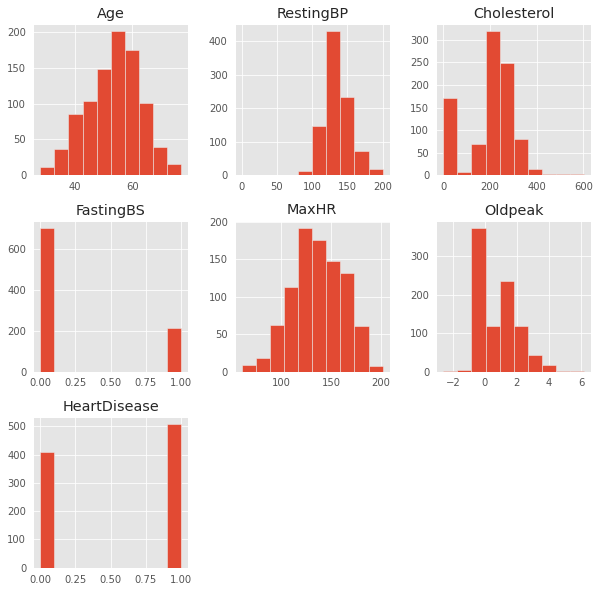

In [89]:
#histogram, plot a distribution of the numerical values
df.hist(bins=10,figsize=(10,10))
plt.show()

Conclusion :- I observe that features of "Age", "RestingBP", and "MaxHR" are normally distributed rest. 

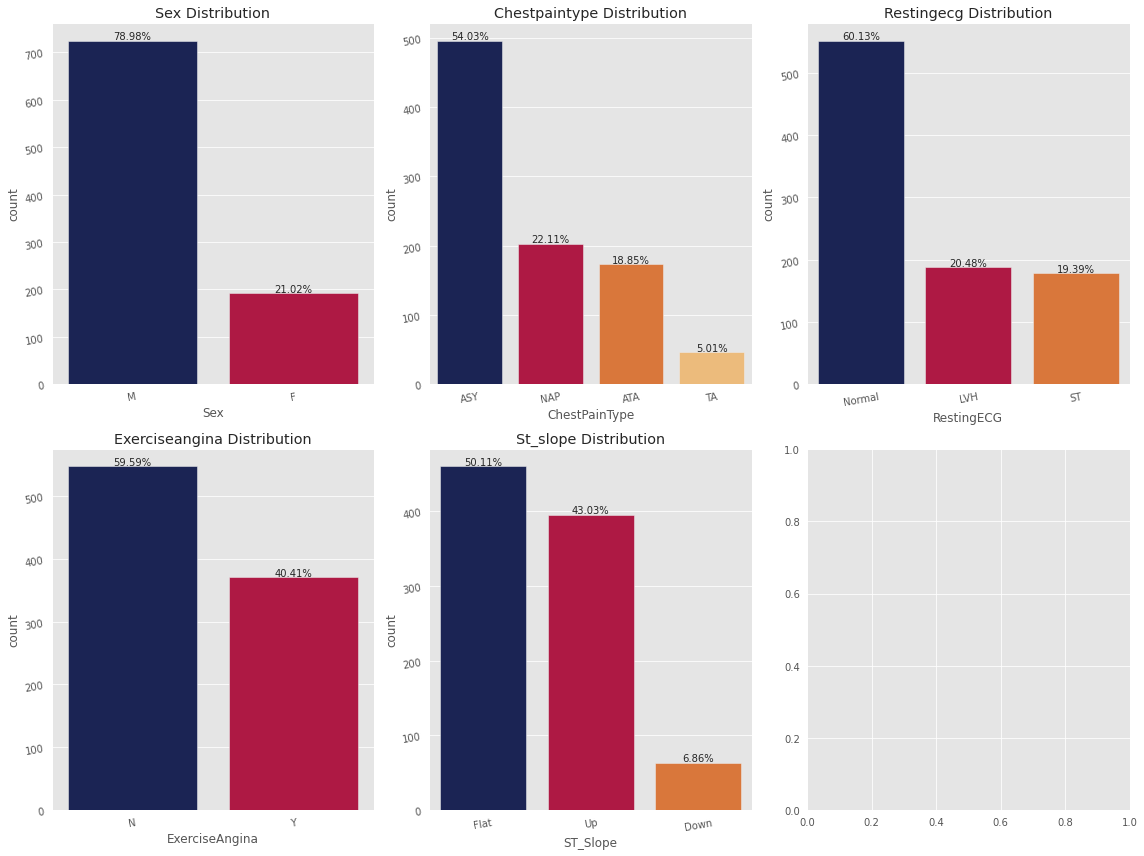

In [90]:
#Categorical Data distribution
categorical = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
ctg_dist(df, categorical,2,3)

## Bivariate Analysis
Bivariate analysis is one of the simplest forms of quantitative analysis. It involves the analysis of two variables, for the purpose of determining the empirical relationship between them. Bivariate analysis can be helpful in testing simple hypotheses of association.

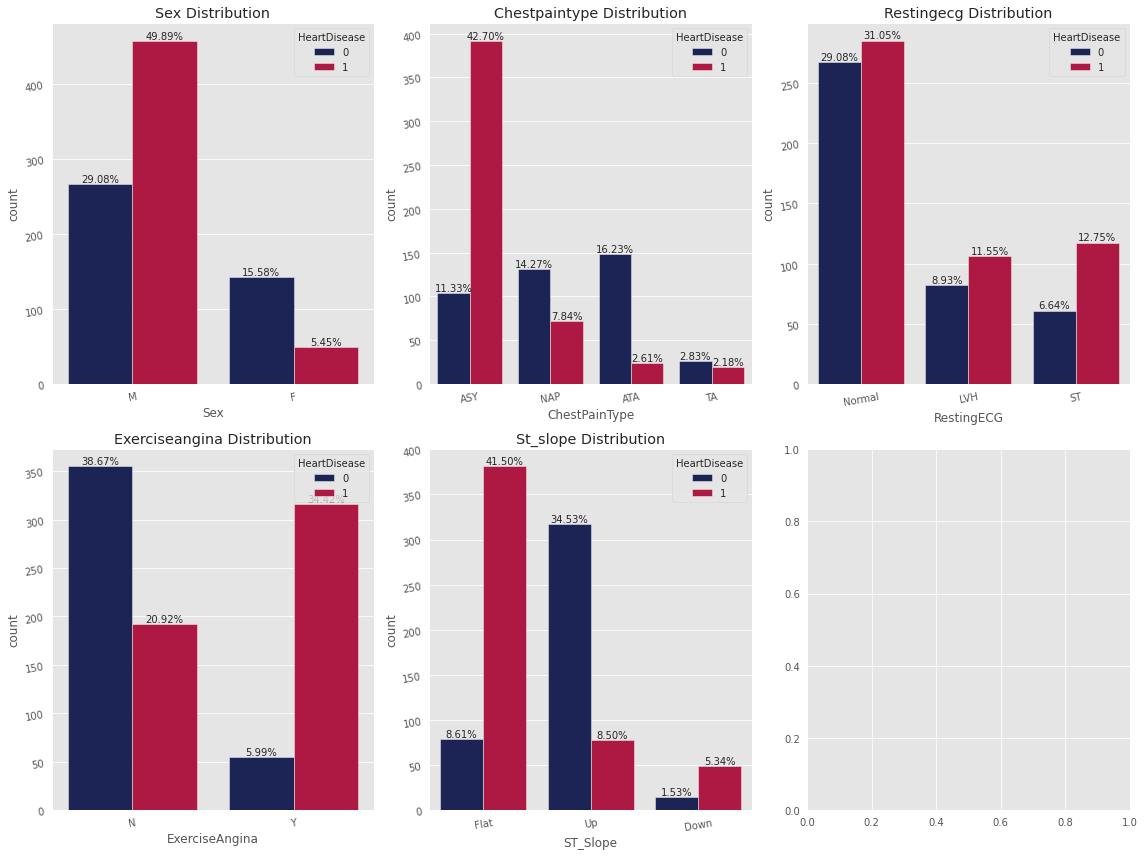

In [91]:
# Categorical data vs HeartDisease
ctg_dist(df, categorical, 2,3, 'HeartDisease')

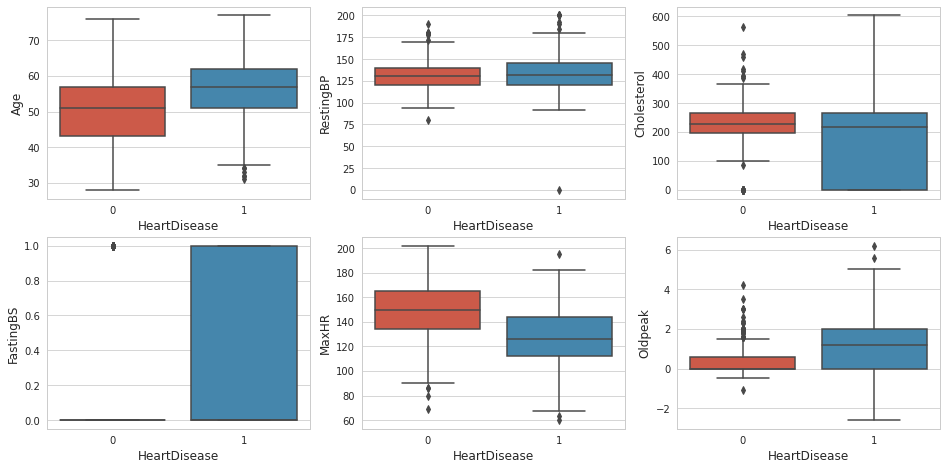

In [92]:
#numerical values vs HeartDisease
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x = 'HeartDisease', y='Age', data=df)
plt.subplot(3,3,2)
sns.boxplot(x = 'HeartDisease', y='RestingBP',data=df)
plt.subplot(3,3,3)
sns.boxplot(x = 'HeartDisease', y='Cholesterol',data=df)
plt.subplot(3,3,4)
sns.boxplot(x = 'HeartDisease', y='FastingBS',data=df)
plt.subplot(3,3,5)
sns.boxplot(x = 'HeartDisease', y='MaxHR',data=df)
plt.subplot(3,3,6)
sns.boxplot(x = 'HeartDisease', y='Oldpeak',data=df)



Conclusion:- I observed that "Age", "RestingBP", "Cholesterol", "MaxHR", and "Oldpeak" have Outliers.

Outliers are unusual values in the dataset, and they can distort statistical analyses and violate their assumptions. Hence it is of utmost importance to deal with them. In this case removing outliers can cause data loss so I will deal with it using various scaling and transformation techniques.

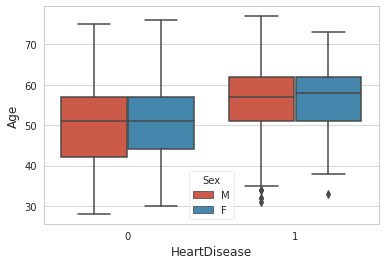

In [93]:
#Compare the median age for male and female using a boxplot
sns.boxplot(data = df, x = 'HeartDisease', y = 'Age' , hue = 'Sex')

Conclusion:- I observed that the median ages of male and female are close in the no heart disease cases. However, in the heart disease cases, the median of female is larger than the median of male. It means that male is earlier to have heart diseas than female.

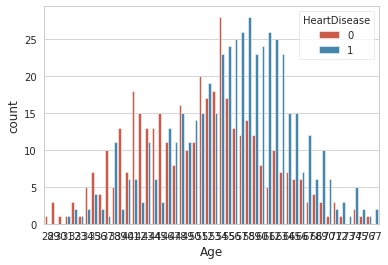

In [94]:
#Plot a histogram showing the age against the target variable (positive vs. negative cases)
sns.countplot(x="Age", data=df ,hue="HeartDisease")
plt.show()

Conclusion:- I observed that when age is larger, the counts of heart disease are larger.

## Multivariate Analysis
Multivariate analysis (MVA) is based on the principles of multivariate statistics, which involves observation and analysis of more than one statistical outcome variable at a time. Typically, MVA is used to address the situations where multiple measurements are made on each experimental unit and the relations among these measurements and their structures are important.

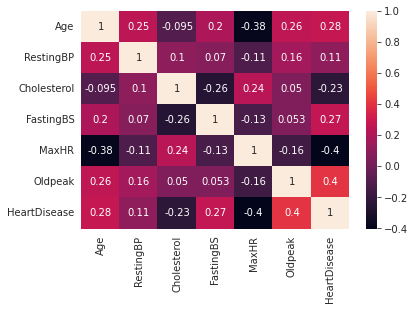

In [95]:
#use a heatmap to check for correlation between predictor variables
corrmat=df.corr()
sns.heatmap(corrmat, annot=True)

Conclusion:- I observed the correlation scores of 'HeartDisease' and other numerical values. the score of 'RestingBP' is the lowest one in all correlation scores.

Since there are only correlation scores of numerical values, I will draw the heatmap again after I encode the other categorical value to numerical values. I will use the new heatmap to decide which feature will be selected to the training model.

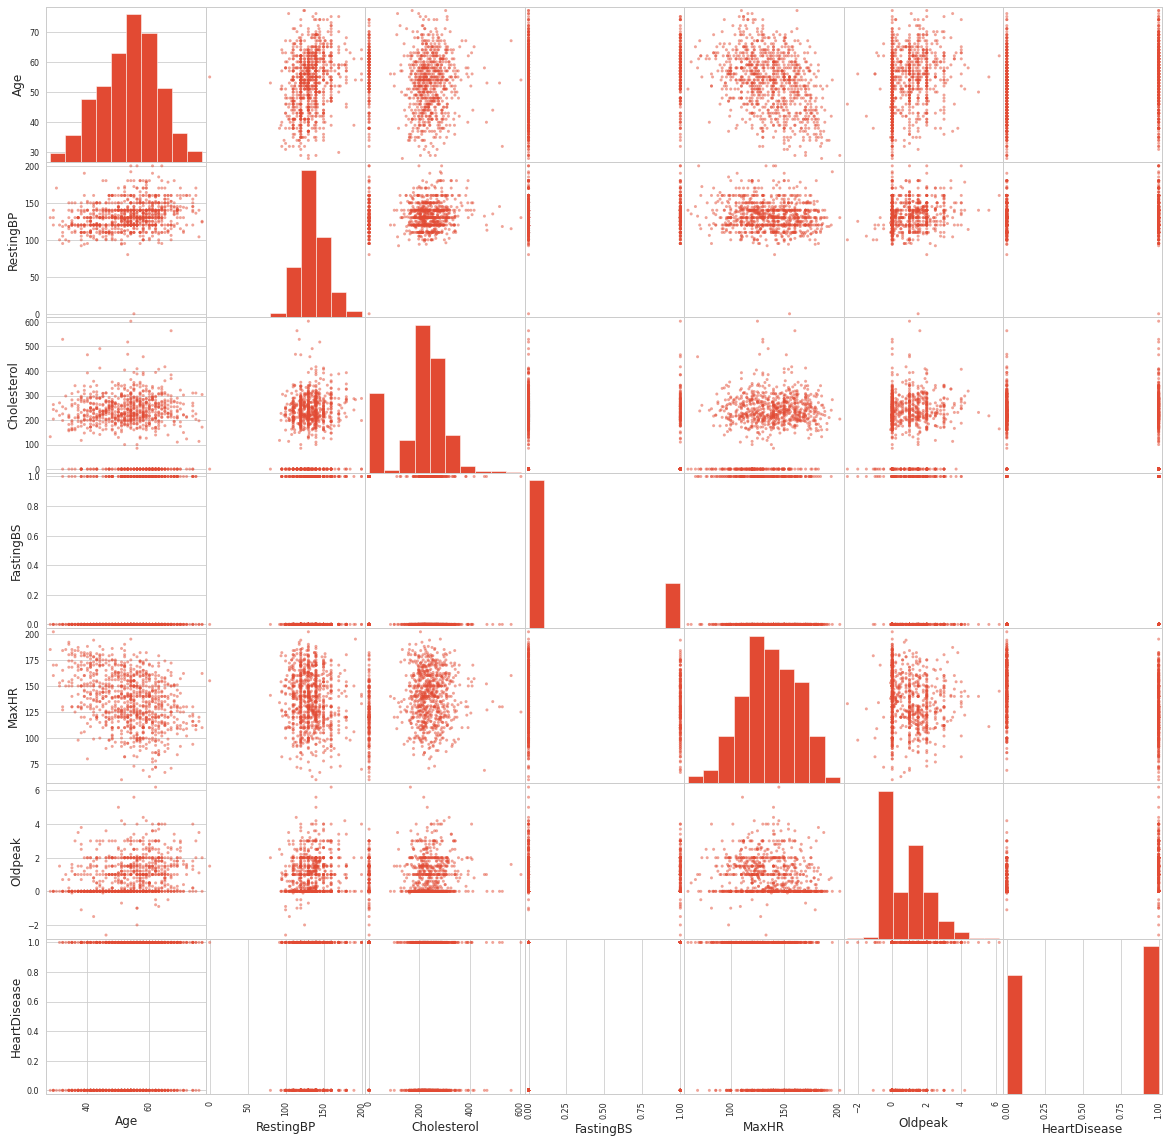

In [96]:
# we can come to various conclusion looking at these plots 
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(20,20));


# Data Cleaning
- Dropping duplicate values
- Checking NULL values
- Check for class imbalance and handle
- Encoding the string categorical value
- Scale the data & handle outliers using a standard scaler

## Dropping duplicate values & Checking NULL values

In [97]:
df=df.drop_duplicates() # check for duplicates & drop

In [98]:
df.isnull().sum() #check for missing values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Check for class imbalance and handle

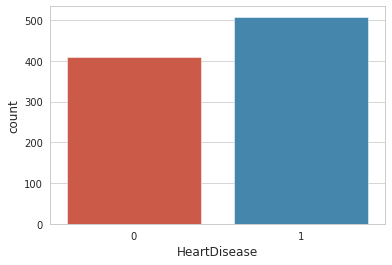

In [99]:
#Count Plot :- to see if the dataset is balanced or not
sns.countplot('HeartDisease',data=df)

Conclusion :- I observe that number of people who has heat disease is close to people who don't have which indicates that our data is balanced. 

## Encode the string categorical value

In [100]:
#Encode the string categorical value
#LABEL ENCODING
# import packages
from sklearn.preprocessing import LabelEncoder

# create label encoder object
le = LabelEncoder()
  
df['Sex']= le.fit_transform(df['Sex'])
df['ChestPainType']= le.fit_transform(df['ChestPainType'])
df['RestingECG']= le.fit_transform(df['RestingECG'])
df['ExerciseAngina']= le.fit_transform(df['ExerciseAngina'])
df['ST_Slope']= le.fit_transform(df['ST_Slope'])

df[['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']].head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,1,1,1,0,2
1,0,2,1,0,1
2,1,1,2,0,2
3,0,0,1,1,1
4,1,2,1,0,2


## Scale the data & handle outliers using a standard scaler

Quantile Transformer transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

In [101]:
from sklearn.preprocessing import QuantileTransformer
x= df
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df = quantile.transform(X)
df = pd.DataFrame(X)
df.columns = ['Age','Sex','ChestPainType','RestingBP', 'Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina', 'Oldpeak','ST_Slope','HeartDisease']
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.093784,1.0,0.634678,0.702290,0.849509,0.0,0.505453,0.912214,0.0,0.214286,1.000000,0.0
1,0.304798,0.0,0.839149,0.926390,0.267721,0.0,0.505453,0.754089,0.0,0.590513,0.318975,1.0
2,0.046347,1.0,0.634678,0.473282,0.827154,0.0,1.000000,0.064340,0.0,0.214286,1.000000,0.0
3,0.276990,0.0,0.000000,0.629226,0.436205,0.0,0.505453,0.125954,1.0,0.729553,0.318975,1.0
4,0.484733,1.0,0.839149,0.842421,0.318430,0.0,0.505453,0.300436,0.0,0.214286,1.000000,0.0


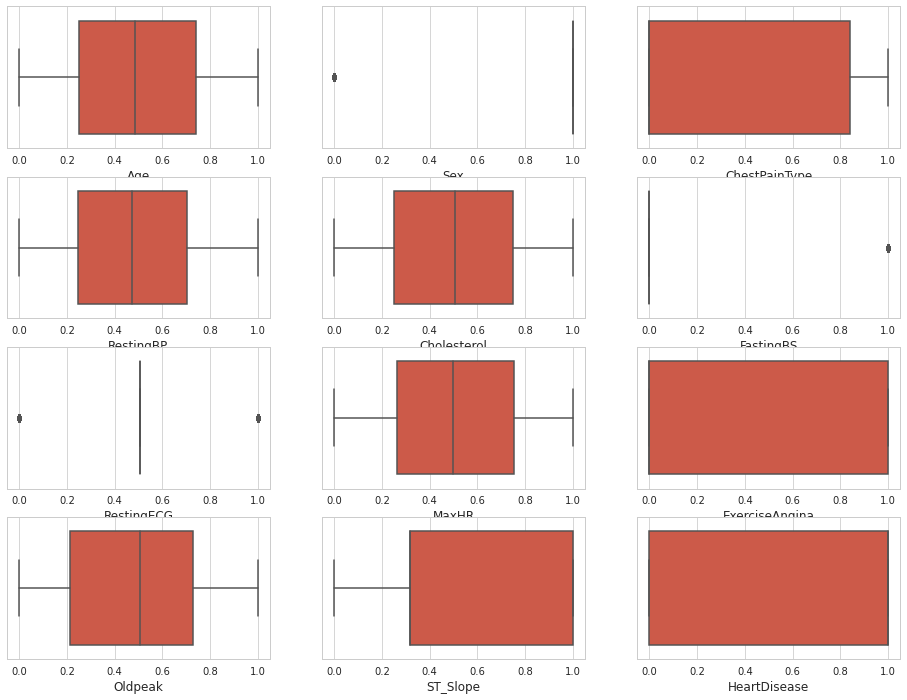

In [102]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
count=1
for i in df.columns:
  plt.subplot(4,3,count)
  sns.boxplot(x=df[i],data=df)
  count+=1

Conclusion: After the Quantile Transformer, there is no Outlier.

# Feature Selection

Pearson's Correlation Coefficient : Helps find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

Following are the septs:
- Drawing heat map
- Selecting relevant features



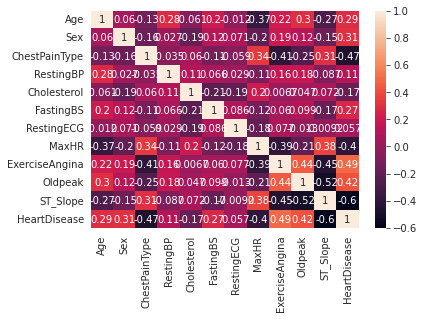

In [25]:
#heat map
corrmat=df.corr()
sns.heatmap(corrmat, annot=True)

In [26]:
upper_tri = corrmat.where(np.triu(np.ones(corrmat.shape), k =1).astype(np.bool))
print(upper_tri)

                Age   Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
Age             NaN  0.06      -0.130377   0.279350    -0.060763   0.201074   
Sex             NaN   NaN      -0.162607   0.026753    -0.186450   0.120076   
ChestPainType   NaN   NaN            NaN  -0.034812     0.060273  -0.108227   
RestingBP       NaN   NaN            NaN        NaN     0.108928   0.065991   
Cholesterol     NaN   NaN            NaN        NaN          NaN  -0.214385   
FastingBS       NaN   NaN            NaN        NaN          NaN        NaN   
RestingECG      NaN   NaN            NaN        NaN          NaN        NaN   
MaxHR           NaN   NaN            NaN        NaN          NaN        NaN   
ExerciseAngina  NaN   NaN            NaN        NaN          NaN        NaN   
Oldpeak         NaN   NaN            NaN        NaN          NaN        NaN   
ST_Slope        NaN   NaN            NaN        NaN          NaN        NaN   
HeartDisease    NaN   NaN            NaN        NaN 

In [27]:
#drop irrelevant features
new_df = df.drop(['RestingBP', 'RestingECG', 'Cholesterol'], axis = 1)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    float64
 1   Sex             918 non-null    float64
 2   ChestPainType   918 non-null    float64
 3   FastingBS       918 non-null    float64
 4   MaxHR           918 non-null    float64
 5   ExerciseAngina  918 non-null    float64
 6   Oldpeak         918 non-null    float64
 7   ST_Slope        918 non-null    float64
 8   HeartDisease    918 non-null    float64
dtypes: float64(9)
memory usage: 64.7 KB


CONCLUSION :- Observed the last row 'HeartDisease' and note its correlation scores with different features. 

We can observe that all correlation scores of 'HeartDisease' and other features are very different.

Finally, I drop 'RestingBP', 'RestingECG', and 'Cholesterol', since their correlation scores are low. Thus, these features don't contribute much to the model.

# Split the Data Frame into X and y

- The train-test split is a technique for evaluating the performance of a machine learning algorithm.

- Train Dataset: Used to fit the machine learning model.

- Test Dataset: Used to evaluate the fit machine learning model.

- I've used 70% train and 30% test

In [103]:
target_name='HeartDisease'
y= new_df[target_name]#given predictions - training data 
X=new_df.drop(target_name,axis=1)#dropping the No-show column and keeping all other columns as X

In [104]:
X.head() # contains only independent features 

,Age,Sex,ChestPainType,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.093784,1.0,0.634678,0.0,0.912214,0.0,0.214286,1.000000
1,0.304798,0.0,0.839149,0.0,0.754089,0.0,0.590513,0.318975
2,0.046347,1.0,0.634678,0.0,0.064340,0.0,0.214286,1.000000
3,0.276990,0.0,0.000000,0.0,0.125954,1.0,0.729553,0.318975
4,0.484733,1.0,0.839149,0.0,0.300436,0.0,0.214286,1.000000


In [105]:
y.head() #contains dependent feature

0    0.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: HeartDisease, dtype: float64

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=0)#splitting data in 70% train, 30%test
X_train.shape,y_train.shape

((642, 8), (642,))

In [107]:
X_test.shape,y_test.shape

((276, 8), (276,))

# Model Building
- Decision Tree
- Ensemble Method
- Deep Learning


## The models include the following:
1. find the optimal tree of the decision tree
2. build the ensemble model using knn,svm, decsion tree and XGboost classifiers
3. build deep learning model using Keras with 3 dense layers
4. Predict on testing data using that model
5. Performance Metrics :- Confusion Matrix, F1 Score, Precision Score, Recall Score 
- Confusion Matrix It is a tabular visualization of the model predictions versus the ground-truth labels.
6. In this case, Accuracy, Precision, Recall, and F1 score are used together to evaluate the preformance of two models.

## Decision Tree
- find the optimal tree

  Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=42)

In [109]:
# Create the parameter grid based on the results of random search
max_depth=[]
min_samples_leaf=[]

for i in range(1,10):
  max_depth.append(i)

for j in range(1,25):
  min_samples_leaf.append(j)

params = {
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'criterion': ["gini", "entropy"]
}

In [110]:
grid_search_dt = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=10, n_jobs=-1, verbose=1, scoring = "accuracy")

In [111]:
grid_search_dt.fit(X_train, y_train)
best_model_dt = grid_search_dt.best_estimator_
best_model_dt

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


DecisionTreeClassifier(max_depth=5, min_samples_leaf=16, random_state=42)

conclusion:- in this case, the best decision tree is max_depth=5 and min_samples_leaf=16. This best one will use in the following ensemble method.

## Ensemble Method



use the majority voting approach to predict class label using KNN (k=5), SVM (kernel = rbf), DT, and XGboost classifiers.

In majority voting, the predicted class
 label for a particular sample is the class label that represents the majority of the class labels predicted by each individual classifier.

In [112]:
import pandas as pd
import numpy as np

# set seed for reproducability
np.random.seed(2017)
import statsmodels.api as sm
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

In [113]:
!pip install mlxtend

### four classifers used in ensemble method 
SVM

KNN

Decision Tree

XGboost

In [114]:
# currently its available as part of mlxtend and not sklearn
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlxtend
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import cross_val_score

svm_clf = SVC(kernel='rbf', random_state=0, probability=True)
knn_clf = KNeighborsClassifier(n_neighbors = 5)
dt_clf = best_model_dt
xgb_clf = xgb.XGBClassifier()




### Ensemble Voting
Hard voting 

Soft voting 

In [115]:
# Ensemble Voting
clfs= []
print('10-fold cross validation:\n')
ECH = EnsembleVoteClassifier(clfs = [svm_clf, knn_clf, dt_clf, xgb_clf], voting='hard')
ECS = EnsembleVoteClassifier(clfs = [svm_clf, knn_clf, dt_clf, xgb_clf], voting='soft', weights=[1,1,1,1])

for clf, label in zip([ECH, ECS],
                      ['Ensemble Hard Voting',
                       'Ensemble Soft Voting']):
    scores = model_selection.cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    print("Train CV Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    md = clf.fit(X_train, y_train)
    clfs.append(md)


10-fold cross validation:

Train CV Accuracy: 0.87 (+/- 0.05) [Ensemble Hard Voting]
Train CV Accuracy: 0.86 (+/- 0.05) [Ensemble Soft Voting]


conclusion:- the accuracy of hard voting and soft. In this project, I choose the hard voting.

### majority Ensemble Voting

In [116]:
# majority Ensemble Voting
clfs= [svm_clf, knn_clf, dt_clf, xgb_clf]
label='majority voting'
print('10-fold cross validation:\n')

ECH = EnsembleVoteClassifier(clfs=clfs, voting='hard')
scores = model_selection.cross_val_score(ECH, X_train, y_train, cv=10, scoring='accuracy')
print("Train CV Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
model_ech = ECH.fit(X_train, y_train)

10-fold cross validation:

Train CV Accuracy: 0.87 (+/- 0.05) [majority voting]


In [117]:


print("Test Accuracy: %0.2f " % (metrics.accuracy_score(model_ech.predict(X_test), y_test)))
print("Classification Report is:\n",classification_report(y_test, model_ech.predict(X_test)))




Test Accuracy: 0.84 
Classification Report is:
               precision    recall  f1-score   support

         0.0       0.80      0.81      0.80       113
         1.0       0.86      0.86      0.86       163

    accuracy                           0.84       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.84      0.84      0.84       276



conclusion:- the accuracy in the training set is 0.87 and in the test set is 0.84. Thus, there is not overfitting.

## Deep Learning

In [118]:
#Neural Network Classification

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV


### create the deep learning model using Keras


In [119]:
def create_model(activation,output_act,dropout_rate):
  model=Sequential()

  model.add(Dense(64,input_shape=(8,)))
  model.add(Activation(activation))
  model.add(Dropout(dropout_rate))

  model.add(Dense(32))
  model.add(Activation(activation))
  model.add(Dropout(dropout_rate))

  model.add(Dense(1))
  model.add(Activation(output_act))

  opt = Adam(lr=0.01)

  model.compile(optimizer=opt,loss="binary_crossentropy", metrics=["accuracy"])
  return model

### Hyper Parameter Tuning using GridSearch CV

In [120]:
model = KerasClassifier(build_fn=create_model)

batch_size = [32, 64] 
epochs = [100] 
activation = [ 'sigmoid','relu', 'tanh'] 
output_act = ['sigmoid','softmax']
dropout_rate = [0.01, 0.05, 0.1, 0.2] 


param_grid = dict(batch_size=batch_size, 
                  nb_epoch=epochs,
                  activation=activation,
                  output_act=output_act,
                  dropout_rate=dropout_rate)


grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1) 

grid_result = grid.fit(X_train,y_train, verbose=0)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) 


Best: 0.866061 using {'activation': 'tanh', 'batch_size': 32, 'dropout_rate': 0.2, 'nb_epoch': 100, 'output_act': 'sigmoid'}


Conclusion:- After using GridSearch CV to tune the Hyper Parameter, the accuracy (0.86) of model is the best mdoel. Thus, I will use those  Hyper Parameter draw the loss and accuracy graph in the following

### Loss and Accuracy Graph

activation function:- 'tanh'

output activation function:- 'sigmoid'

dropouts rate:- 0.2

epochs :- 100

batch size :- 32



In [121]:
model=create_model('tanh','sigmoid', 0.2)
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 64)                576       
                                                                 
 activation_27 (Activation)  (None, 64)                0         
                                                                 
 dropout_18 (Dropout)        (None, 64)                0         
                                                                 
 dense_28 (Dense)            (None, 32)                2080      
                                                                 
 activation_28 (Activation)  (None, 32)                0         
                                                                 
 dropout_19 (Dropout)        (None, 32)                0         
                                                                 
 dense_29 (Dense)            (None, 1)                

accuracy and loss



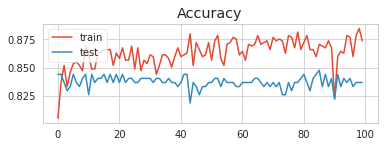

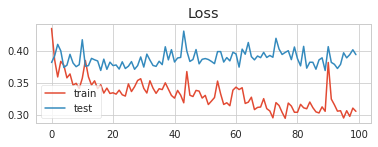


The accuracy and loss of the Neural Network classifier on test data is 0.84 and 0.39



In [122]:
from matplotlib import pyplot

hist=model.fit(X_train,y_train,validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=0)
  
print('accuracy and loss\n')
 
acc = hist.history['accuracy']
loss = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

pyplot.subplot(211)
pyplot.title('Accuracy')
pyplot.plot(acc, label='train')
pyplot.plot(val_acc, label='test')
pyplot.legend()
pyplot.show()

pyplot.subplot(212)
pyplot.title('Loss')
pyplot.plot(loss, label='train')
pyplot.plot(val_loss, label='test')
pyplot.legend()
pyplot.show()


loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("\nThe accuracy and loss of the Neural Network classifier on test data is {:.2f} and {:.2f}\n".format(accuracy, loss))

conclusion:- According to the graph, the accuracy in the training set(0.86)  and test set (0.84) are close. Thus, there is not overfitting.

# Model Comparison, Evaluation
1. Compare the results of the ensemble method with the deep neural network model in terms of the following criteria: precision, recall, accuracy, F-measure.
- Accuracy: The accuracy of a test is its ability to differentiate show up and not show up cases correctly.

- F1 Score :- It’s the harmonic mean between precision and recall.

- Precision Score Precision is the fraction of predicted positives/negatives events that are actually positive/negatives.

- Recall Score It is the fraction of positives/negative events that you predicted correctly.

2. Identify the model that performed best and worst according to each criterion.

## Evaluation of Ensemble Method

Accuracy: 0.8369565217391305
precision: 0.8641975308641975
recall: 0.8588957055214724
F1: 0.8615384615384616

 Confusion Matrix:



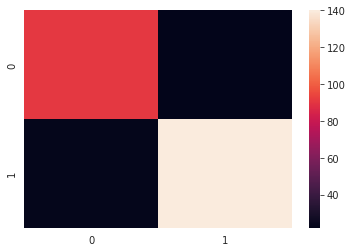

In [123]:
#precision, recall, accuracy, F-measure of ensemble method
confusion = confusion_matrix(y_test,model_ech.predict(X_test))
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
accuracy = (TP+TN)/float(TP+TN+FP+FN)
precision = TP / float(TP+FP)
recall = TP / float(TP+FN)
print('Accuracy:',accuracy)
print('precision:',precision)
print('recall:', recall) 
print('F1:', 2*(recall * precision) / (recall + precision)) 

print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,model_ech.predict(X_test)))


## Evaluation of Deep Learning

In [124]:
#Deep learning evaluation
pred = model.predict(X_test)
y_pred = [1 if r>0.5 else 0 for r in pred]

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,y_pred)
matrix

array([[ 84,  29],
       [ 16, 147]])

              precision    recall  f1-score   support

         0.0       0.84      0.74      0.79       113
         1.0       0.84      0.90      0.87       163

    accuracy                           0.84       276
   macro avg       0.84      0.82      0.83       276
weighted avg       0.84      0.84      0.84       276

Precision : 0.8352272727272727
Recall : 0.901840490797546
Accuracy: 0.8369565217391305
F1 score: 0.8672566371681416

 Confusion Matrix:



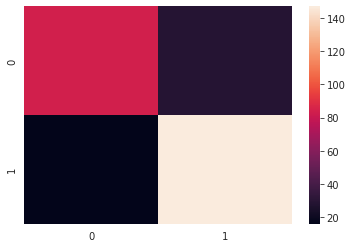

In [125]:
print(metrics.classification_report(y_test, y_pred))
print("Precision :", metrics.precision_score(y_test, y_pred))
print("Recall :", metrics.recall_score(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("F1 score:", metrics.f1_score(y_test, y_pred))

confusion = confusion_matrix(y_test, y_pred)
print("\n Confusion Matrix:\n")
sns.heatmap(confusion)


# Conclusion
1. According to the confusion matrix, in the Ensemble method, Accuracy is 0.84, precision is 0.86, recall is 0.85, and F1 is 0.86.
2. Based on the confusion matrix, in the deep neural network, Accuracy is 0.84, precision is 0.84, recall is 0.90, and F1 is 0.86.
3. the Accuracy, precision and F1 in both  ensemble method and deep learning model are close. However, the recall of deep learning model is higher than the recall of ensemble method. 

In this case, the performances of the ensemble method and deep neural network are good. Both of them are good models for this dataset. However, based on the recall scores, the deep nerual network is a litter better than ensemble method.

Moreover, in this case, the dataset is too small that only include 918 records. however, if the dataset's size was larger, maybe deep neural network will be better. Since deep neural network is applicable for large dataset.




